## Using DBSCAN directly on the features

### Imports

In [78]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import os
import ntpath
import pickle as pkl
import xlrd
import time
import string
import math

from os import listdir
from os.path import isfile, join
from collections import Counter

### Notebook options

In [79]:
pd.set_option('display.max_colwidth', -1) # Column width
plt.rcParams['figure.figsize'] = [15, 10] # Size of the plots

### General Assumptions

In [80]:
time_col = 'datetime'
time_gran_col = 'datetime_gran'
value_col = 'val'
scaled_value_col = 'scaled_val'
time_granularity = 'min'

In [81]:
fmt = '%Y-%m-%d %H:%M:%S'
base_date = datetime.strptime('2016-01-01 00:00:01', fmt)
start_date = datetime.strptime('2016-01-01 00:00:01', fmt)
stop_date = datetime.strptime('2019-01-01 00:00:01', fmt)

### Data Directories

In [82]:
pump = 'P6302B'
RAW_DATA_DIR = '../data/raw/'+pump+'/'
PROC_DATA_DIR = '../data/processed/'+pump+'/'
INT_DATA_DIR = '../data/interim/'+pump+'/'

# GridSearch-like for DBSCAN

In [83]:
from collections import Counter
from sklearn.cluster import DBSCAN


def dbscan_gridsearch(eps_list, min_pts_list, agg_val):
    
    ### Read aggregated data
    agg_col = 'agg' + str(agg_val) 
    input_file = INT_DATA_DIR + 'agg_single/' + agg_col + '.csv'
    with open(input_file, 'rb') as f:
        df_all = pd.read_csv(input_file)

    df_all.bfill(inplace=True)
    
    print('Instances = ', len(df_all))
    print('| Eps | \tmpts | \tClus | \tAnom | \tTime |')
    print('| -- | -- | -- | -- | -- |')
    
    for eps in eps_list:
        for min_samples in min_pts_list:

            tic = time.time()
            X = df_all.drop(columns=agg_col)
            clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            toc = time.time()
            total_time = toc-tic

            labels = clustering.labels_
            unq_labels = np.unique(labels)
            # print('Number of clusters found', len(unq_labels))

            counter = Counter(labels)

            outliers_count = 0
            # The percentages in frequency_dict wont add upto 100 since only
            # values more than 1 are added to the new dictionary - look at the 
            # if statement below
            frequency_dict = {}
            for k in counter:
                v = counter[k]
                frequency_dict[k] = v

                if k == -1:
                    outliers_count = v

            print('|' + str(eps) + '|\t' + str(min_samples) + '|\t' + str(len(unq_labels)-1) + '|\t' + str(outliers_count) + '|\t' + str(total_time) + '|')

        # print('------------------------------------')
    # print('------------------------------------')

In [84]:
# min_pts_list = [3, 5]
# eps_list = [0.1, 0.2]

eps_list = [0.55, 0.60, 0.7, 0.8, 0.9, 0.95]
min_pts_list = [3, 4, 5, 7]

In [77]:
dbscan_gridsearch(eps_list=eps_list, min_pts_list=min_pts_list, agg_val=5)

# Check github for results of this cell - https://github.com/AmiiThinks/shell_scotford/issues/8

Instances =  525889
| Eps | 	mpts | 	Clus | 	Anom | 	Time |
| -- | -- | -- | -- | -- |
|0.55|	3|	241|	4207|	2153.2271449565887|
|0.55|	4|	202|	4665|	2303.107187986374|
|0.55|	5|	189|	4997|	13201.889558076859|
|0.55|	7|	149|	5738|	37991.954619169235|
|0.6|	3|	237|	3600|	2238.4260029792786|
|0.6|	4|	188|	4079|	2380.626846075058|
|0.6|	5|	174|	4354|	2371.4861149787903|
|0.6|	7|	137|	5006|	2266.364713907242|
|0.7|	3|	190|	2818|	4034.6273460388184|
|0.7|	4|	158|	3155|	981183.610065937|
|0.7|	5|	150|	3377|	6658.186418771744|
|0.7|	7|	122|	3941|	3432.4950761795044|
|0.8|	3|	164|	2098|	3759.8831820487976|
|0.8|	4|	133|	2405|	3760.148784160614|
|0.8|	5|	124|	2598|	43897.16488003731|
|0.8|	7|	96|	3065|	4236.786043167114|
|0.9|	3|	132|	1468|	4406.808334112167|
|0.9|	4|	119|	1713|	13340.631150007248|
|0.9|	5|	102|	1902|	5669.883981227875|
|0.9|	7|	86|	2345|	3211.0821466445923|
|0.95|	3|	125|	1220|	39985.2606921196|
|0.95|	4|	106|	1438|	3194.845705986023|
|0.95|	5|	90|	1609|	4854.396733999252|
|0.9

In [ ]:
dbscan_gridsearch(eps_list=eps_list, min_pts_list=min_pts_list, agg_val=10)

# Check github for results of this cell - https://github.com/AmiiThinks/shell_scotford/issues/8

Instances =  262945
| Eps | 	mpts | 	Clus | 	Anom | 	Time |
| -- | -- | -- | -- | -- |
|0.55|	3|	254|	3041|	25617.124460220337|
|0.55|	4|	206|	3592|	684.4284417629242|
|0.55|	5|	177|	3996|	689.3276300430298|
|0.55|	7|	147|	4824|	594.8703429698944|
|0.6|	3|	235|	2449|	683.8636186122894|
|0.6|	4|	186|	2937|	613.010792016983|
|0.6|	5|	159|	3285|	756.0627110004425|
|0.6|	7|	142|	3939|	831.614264011383|
|0.7|	3|	194|	1616|	1557.491541147232|
|0.7|	4|	140|	1989|	706.0347740650177|
|0.7|	5|	118|	2247|	684.1626670360565|
|0.7|	7|	107|	2810|	662.3403918743134|
|0.8|	3|	151|	1039|	803.1730489730835|
|0.8|	4|	111|	1306|	785.5437841415405|
|0.8|	5|	103|	1493|	772.8931930065155|
|0.8|	7|	91|	1935|	916.0310547351837|
|0.9|	3|	110|	719|	1013.8829779624939|
|0.9|	4|	86|	910|	1786.0029201507568|
|0.9|	5|	70|	1061|	965.4178900718689|
|0.9|	7|	74|	1324|	996.0782289505005|
|0.95|	3|	92|	581|	1029.0809261798859|


In [ ]:
dbscan_gridsearch(eps_list=eps_list, min_pts_list=min_pts_list, agg_val=15)

# Check github for results of this cell - https://github.com/AmiiThinks/shell_scotford/issues/8

In [ ]:
dbscan_gridsearch(eps_list=eps_list, min_pts_list=min_pts_list, agg_val=30)

# Check github for results of this cell - https://github.com/AmiiThinks/shell_scotford/issues/8

In [68]:
dbscan_gridsearch(eps_list=eps_list, min_pts_list=min_pts_list, agg_val=60)

# Check github for results of this cell - https://github.com/AmiiThinks/shell_scotford/issues/8

Instances =  43825
| Eps | 	mpts | 	Clus | 	Anom | 	Time |
| -- | -- | -- | -- | -- |
|0.55|	3|	183|	1735|	21.142450094223022|
|0.55|	4|	146|	2065|	20.80605411529541|
|0.55|	5|	124|	2392|	22.890537977218628|
|0.55|	7|	88|	3000|	23.061266899108887|
|0.6|	3|	151|	1387|	24.960809230804443|
|0.6|	4|	115|	1660|	23.037946939468384|
|0.6|	5|	98|	1908|	22.638755798339844|
|0.6|	7|	81|	2415|	22.59878897666931|
|0.7|	3|	117|	961|	25.403451204299927|
|0.7|	4|	80|	1158|	25.929566144943237|
|0.7|	5|	68|	1322|	25.033225059509277|
|0.7|	7|	58|	1640|	24.631006002426147|
|0.8|	3|	84|	690|	28.28703212738037|
|0.8|	4|	59|	863|	29.039584159851074|
|0.8|	5|	51|	964|	29.23576593399048|
|0.8|	7|	40|	1203|	29.55728816986084|
|0.9|	3|	68|	501|	32.14202904701233|
|0.9|	4|	52|	619|	31.922912120819092|
|0.9|	5|	42|	722|	31.026884078979492|
|0.9|	7|	31|	909|	31.106539964675903|
|0.95|	3|	58|	432|	33.41821908950806|
|0.95|	4|	45|	533|	33.557721853256226|
|0.95|	5|	37|	621|	32.9796998500824|
|0.95|	7|	31|	781|	32.71

In [ ]:
# From the results, its evident that keeping the min_pts low and epsilon high gives results that makes the most sense

### Dictionary to hold the values

In [17]:
df_dbscan = {}

## Agg = 60 mins - Using Features directly

### DBSCAN

In [35]:
### Read aggregated data

agg_val = 60
agg_col = 'agg' + str(agg_val) 
input_file = INT_DATA_DIR + 'agg_single/' + agg_col + '.csv'
with open(input_file, 'rb') as f:
    df = pd.read_csv(input_file)

In [36]:
# Backfilling to fill up 2 features with missing one year value 
df.bfill(inplace=True)

In [37]:
from sklearn.cluster import DBSCAN

tic = time.time()
eps = .8
min_samples = 3
X = df.drop(columns=agg_col)
print('Total number of instances', len(X))
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
toc = time.time()

labels = clustering.labels_
unq_labels = np.unique(labels)
print('Number of clusters found', len(unq_labels), unq_labels)

print('Total time taken = ', (toc-tic), 'secs')

print(Counter(labels))

Total number of instances 43825
Number of clusters found 85 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83]
Total time taken =  20.47091507911682 secs
Counter({0: 41455, -1: 690, 8: 338, 50: 272, 48: 99, 28: 70, 9: 68, 15: 58, 49: 56, 40: 46, 36: 43, 32: 37, 27: 34, 37: 30, 17: 26, 29: 24, 60: 24, 35: 23, 41: 20, 82: 18, 26: 16, 75: 16, 11: 14, 52: 14, 39: 13, 72: 12, 45: 11, 77: 11, 12: 10, 33: 10, 21: 9, 38: 9, 44: 9, 43: 8, 70: 8, 16: 7, 42: 7, 51: 7, 63: 7, 14: 6, 19: 6, 23: 6, 46: 6, 47: 6, 59: 6, 62: 6, 65: 6, 67: 6, 76: 6, 1: 5, 2: 5, 4: 5, 5: 5, 13: 5, 58: 5, 66: 5, 71: 5, 74: 5, 79: 5, 80: 5, 81: 5, 18: 4, 22: 4, 25: 4, 64: 4, 3: 3, 6: 3, 7: 3, 10: 3, 20: 3, 24: 3, 30: 3, 31: 3, 34: 3, 57: 3, 53: 3, 54: 3, 55: 3, 56: 3, 61: 3, 68: 3, 69: 3, 73: 3, 78: 3, 83: 3})


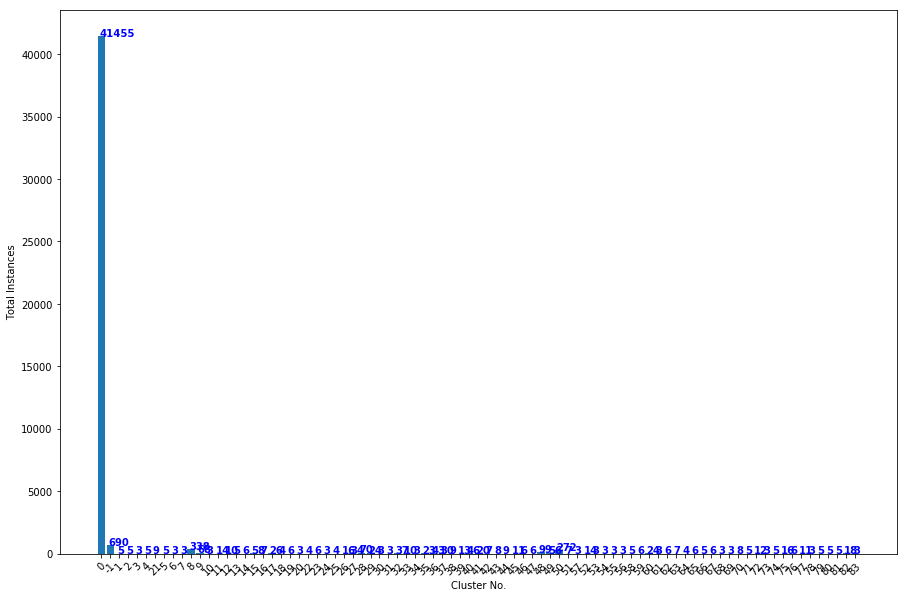

In [38]:
from collections import Counter

counter = Counter(labels)

# The percentages in frequency_dict wont add upto 100 since only
# values more than 1 are added to the new dictionary - look at the 
# if statement below
frequency_dict = {}
for k in counter:
    v = counter[k]
    frequency_dict[k] = v
    
plt.rcParams['figure.figsize'] = [15, 10] # Size of the plots

x = list(frequency_dict.keys())
x = list(map(str, x))
y = list(frequency_dict.values())

for i, v in enumerate(y):
    v = round(v, 3)
    plt.text(i-.25, v + .25, str(v), color='blue', fontweight='bold')

plt.bar(x,y)
plt.xlabel('Cluster No.')
plt.ylabel('Total Instances')
plt.xticks(x, x, rotation=45)
plt.show()

In [39]:
# Change labels to either be a part of cluster or outliers
# Outliers have a label of -1
labels_mod = np.array([0 if i >= 0 else -1 for i in labels])

In [40]:
from utils import get_time_from_minutes
labels = labels.reshape(len(labels), 1)

df['labels'] = labels_mod
df[time_col] = df[agg_col].apply(lambda x: get_time_from_minutes(x, base_date))
df_dbscan[agg_col] = df

pkl_file = '../data/results/'+pump+'/dbscan/' + 'dbscan_'+agg_col+'_'+str(eps)+'_'+str(min_samples)+'.pkl'
df = df_dbscan[agg_col]
with open(pkl_file, 'wb') as f:
    pkl.dump(df, f, protocol=pkl.HIGHEST_PROTOCOL)

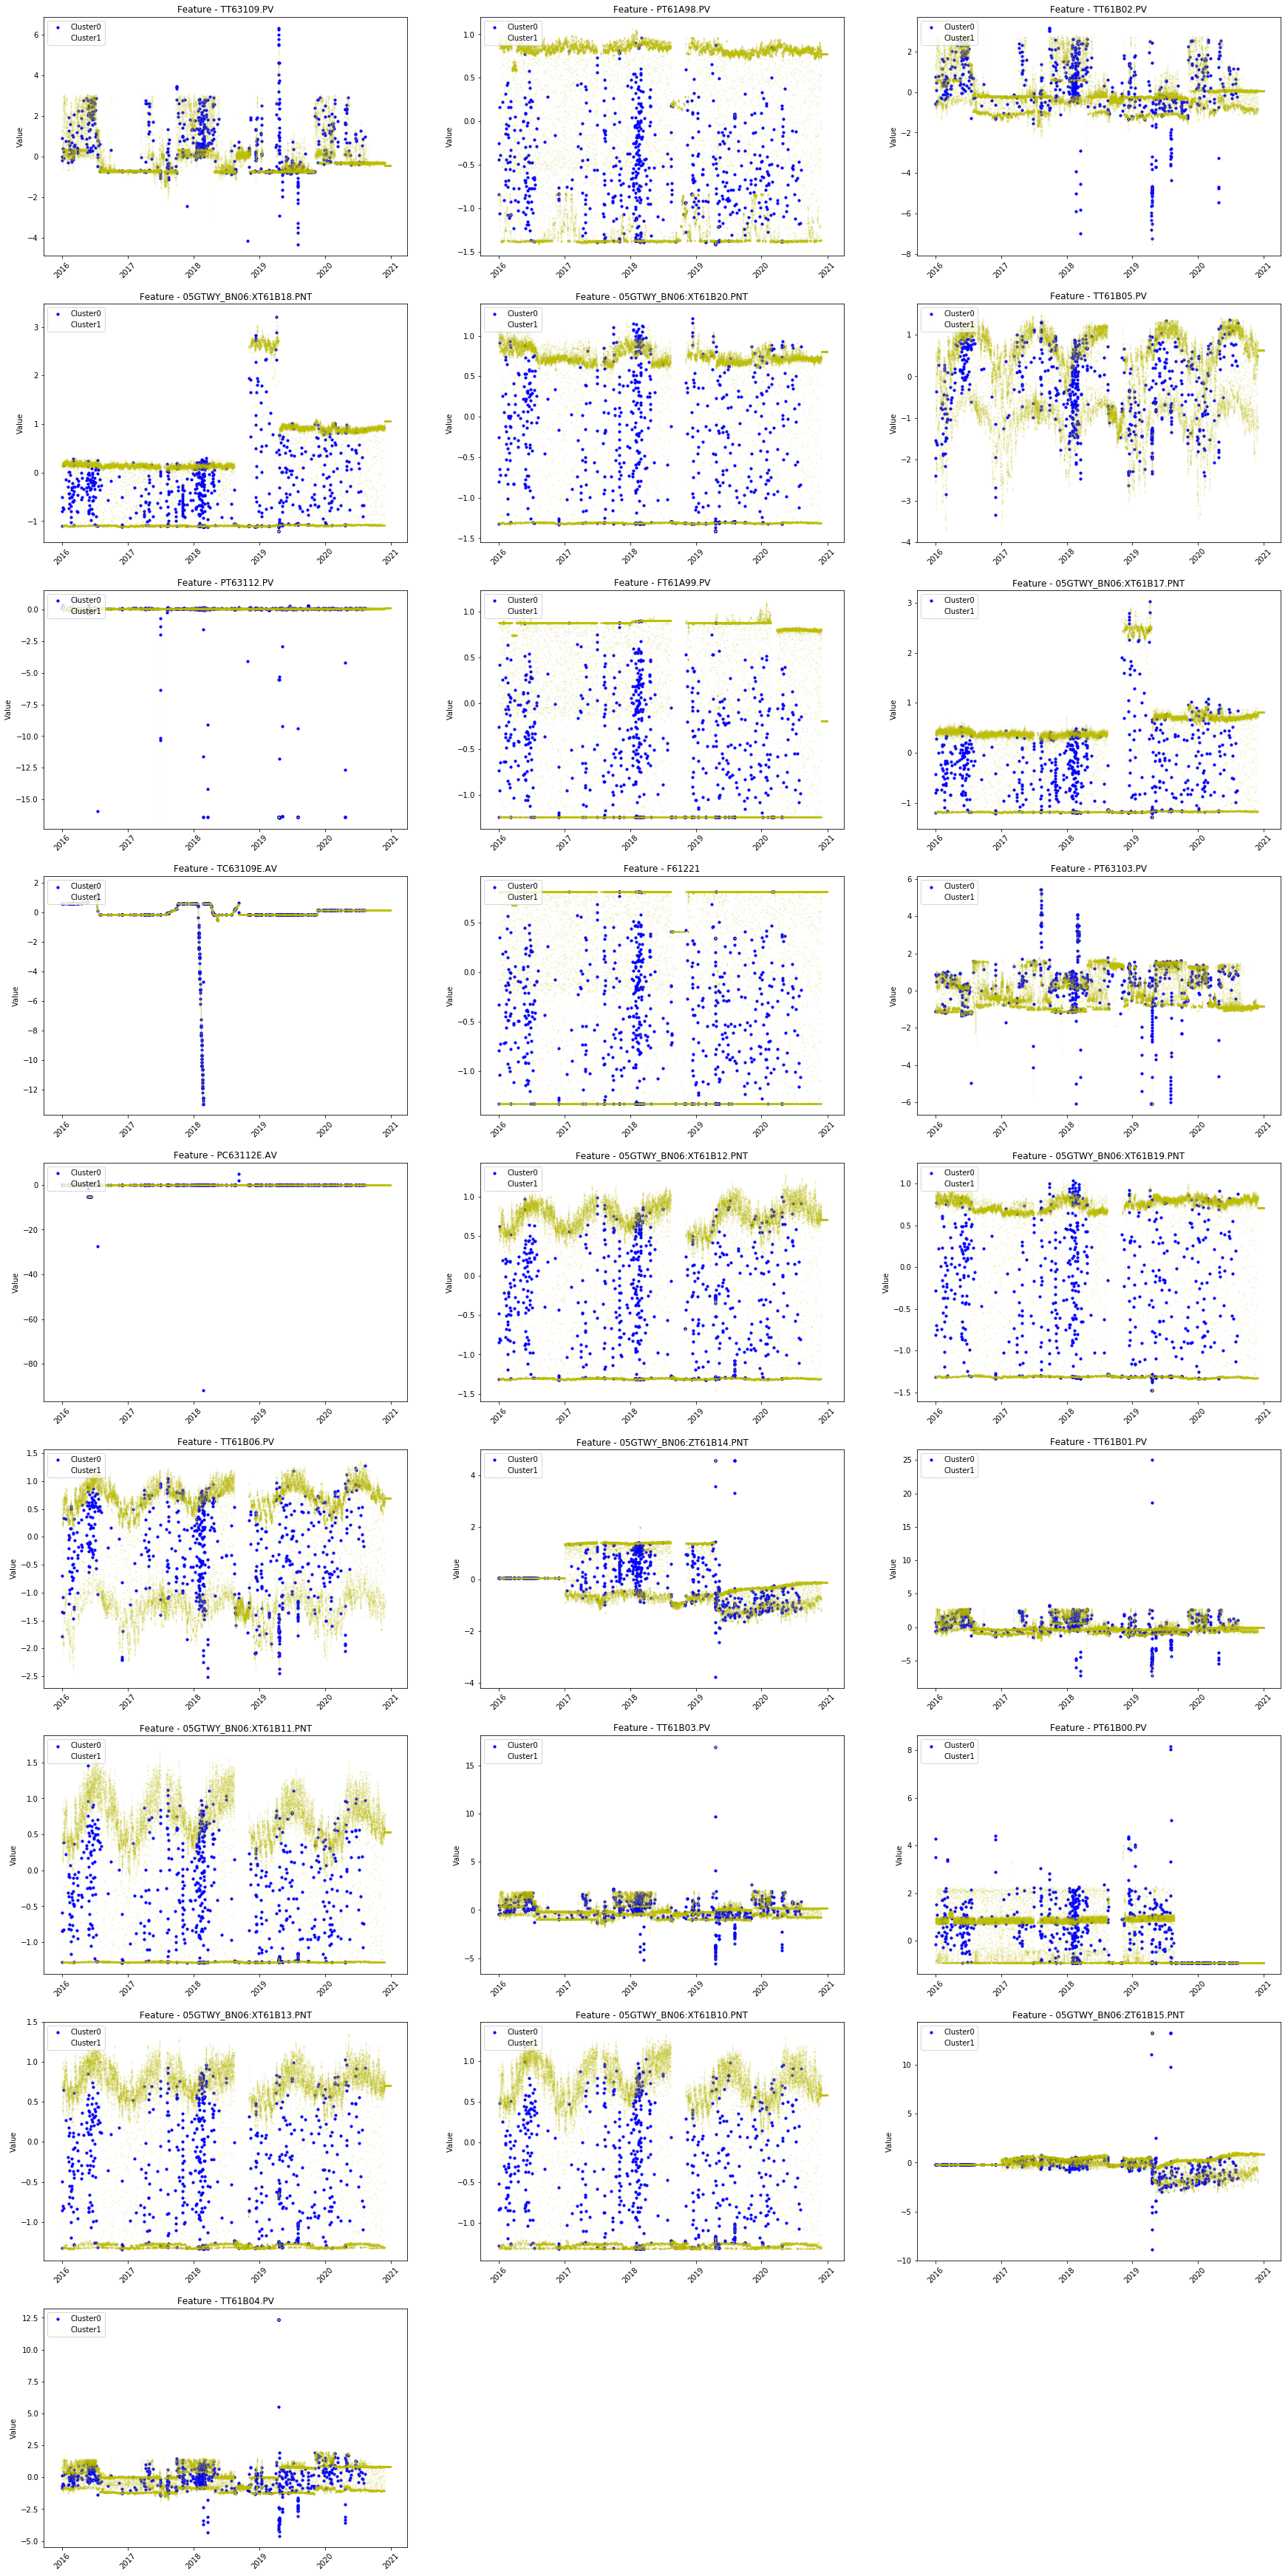

In [41]:
feature_set = list(X.keys())

colors = ['b', 'y', 'r', 'c', 'm', 'g', 'k']
xlabel = 'Time'
ylabel = 'Value'

total_plots = len(feature_set)
cols_plot = 3
rows_plot = math.ceil(total_plots/cols_plot)

plt.rcParams['figure.figsize'] = [cols_plot * 10, rows_plot * 7] # Size of the plots        
plt.figure()

unq_labels = np.unique(df_dbscan[agg_col]['labels'])
unq_labels.sort()

df_db = df_dbscan[agg_col]

idx = 0
for feature in feature_set:
       
    df = df_db[[time_col, feature, 'labels']]
    
    plt.subplot(rows_plot, cols_plot, idx+1)
    
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title('Feature - ' + feature)
    
    
    for i in range(len(unq_labels)):

        cluster_num = unq_labels[i]
        df_cluster = df[[time_col, feature]].loc[df['labels'] == cluster_num]
        x = np.array(df_cluster[time_col])
        y = np.array(df_cluster[feature])
        
        if cluster_num == -1:
            color = colors[0]
            size = 10
            alpha = 1
        else:
            color = colors[cluster_num+1%len(colors)]
            size = 1
            alpha = 0.1
            
        plt.scatter(x, y, c=color, alpha=alpha, s=size, label='Cluster'+str(i))
        
    plt.legend(loc='upper left')

    idx += 1

### Dates with outliers

In [42]:
df = df_dbscan[agg_col]
df = df[['labels','datetime']].loc[df['labels'] == -1]
df['dates'] = df['datetime'].apply(lambda x: x.date())
print(df.columns.values)
outlier_dates = np.unique(df['dates'])

print('Number of dates with outliers ', len(outlier_dates))

['labels' 'datetime' 'dates']
Number of dates with outliers  371


## Agg = 5 mins

### DBSCAN

In [46]:
### Read aggregated data

agg_val = 5
agg_col = 'agg' + str(agg_val) 
input_file = INT_DATA_DIR + 'agg_single/' + agg_col + '.csv'
with open(input_file, 'rb') as f:
    df = pd.read_csv(input_file)

In [47]:
# Backfilling to fill up 2 features with missing one year value 
df.bfill(inplace=True)

In [48]:
from sklearn.cluster import DBSCAN

tic = time.time()
eps = .9
min_samples = 3
X = df.drop(columns=agg_col)
print('Total number of instances', len(X))
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
toc = time.time()

labels = clustering.labels_
unq_labels = np.unique(labels)
print('Number of clusters found', len(unq_labels), unq_labels)

print('Total time taken = ', (toc-tic), 'secs')

Total number of instances 525889
Number of clusters found 133 [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131]
Total time taken =  4024.2501907348633 secs


In [56]:
print(Counter(clustering.labels_))

Counter({0: 462582, 65: 26067, 91: 25515, 17: 5105, -1: 1468, 56: 653, 74: 562, 54: 559, 53: 478, 111: 265, 123: 205, 34: 199, 38: 167, 101: 134, 75: 132, 62: 115, 61: 91, 58: 89, 60: 72, 89: 68, 120: 67, 39: 66, 76: 65, 49: 62, 72: 61, 73: 57, 130: 48, 109: 47, 88: 38, 48: 34, 57: 34, 108: 34, 87: 30, 6: 27, 126: 27, 84: 25, 2: 24, 127: 22, 55: 21, 24: 18, 67: 18, 100: 18, 59: 16, 80: 16, 90: 15, 93: 15, 113: 15, 42: 14, 46: 13, 8: 11, 110: 11, 30: 10, 36: 10, 66: 10, 5: 9, 11: 9, 115: 9, 14: 8, 21: 8, 33: 8, 81: 8, 85: 8, 94: 8, 82: 7, 83: 7, 98: 7, 99: 7, 3: 6, 9: 6, 10: 6, 23: 6, 77: 6, 86: 6, 12: 5, 35: 5, 40: 5, 45: 5, 47: 5, 64: 5, 70: 5, 78: 5, 92: 5, 95: 5, 103: 5, 106: 5, 119: 5, 122: 5, 1: 4, 4: 4, 7: 4, 15: 4, 13: 4, 25: 4, 27: 4, 26: 4, 29: 4, 50: 4, 68: 4, 69: 4, 79: 4, 97: 4, 104: 4, 117: 4, 129: 4, 16: 3, 18: 3, 19: 3, 22: 3, 20: 3, 37: 3, 28: 3, 31: 3, 32: 3, 63: 3, 43: 3, 41: 3, 44: 3, 51: 3, 52: 3, 71: 3, 96: 3, 114: 3, 102: 3, 105: 3, 107: 3, 112: 3, 116: 3, 118: 3,

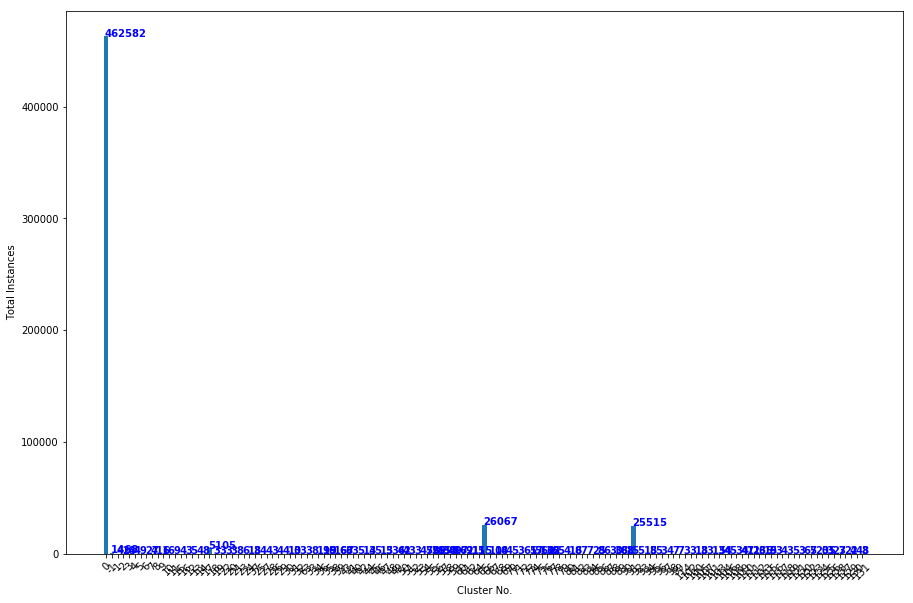

In [49]:
from collections import Counter

counter = Counter(labels)

# The percentages in frequency_dict wont add upto 100 since only
# values more than 1 are added to the new dictionary - look at the 
# if statement below
frequency_dict = {}
for k in counter:
    v = counter[k]
    frequency_dict[k] = v
    
plt.rcParams['figure.figsize'] = [15, 10] # Size of the plots

x = list(frequency_dict.keys())
x = list(map(str, x))
y = list(frequency_dict.values())

for i, v in enumerate(y):
    v = round(v, 3)
    plt.text(i-.25, v + .25, str(v), color='blue', fontweight='bold')

plt.bar(x,y)
plt.xlabel('Cluster No.')
plt.ylabel('Total Instances')
plt.xticks(x, x, rotation=45)
plt.show()

In [50]:
# Change labels to either be a part of cluster or outliers
# Outliers have a label of -1
labels_mod = np.array([0 if i >= 0 else -1 for i in labels])

In [51]:
from utils import get_time_from_minutes
labels = labels.reshape(len(labels), 1)
# df_dbscan[agg_col] = df.copy()
df['labels'] = labels_mod
df[time_col] = df[agg_col].apply(lambda x: get_time_from_minutes(x, base_date))


df_dbscan[agg_col] = df


import pickle as pkl

pkl_file = '../data/results/'+pump+'/dbscan/' + 'dbscan_'+agg_col+'_'+str(eps)+'_'+str(min_samples)+'.pkl'
df = df_dbscan[agg_col]
with open(pkl_file, 'wb') as f:
    pkl.dump(df, f, protocol=pkl.HIGHEST_PROTOCOL)

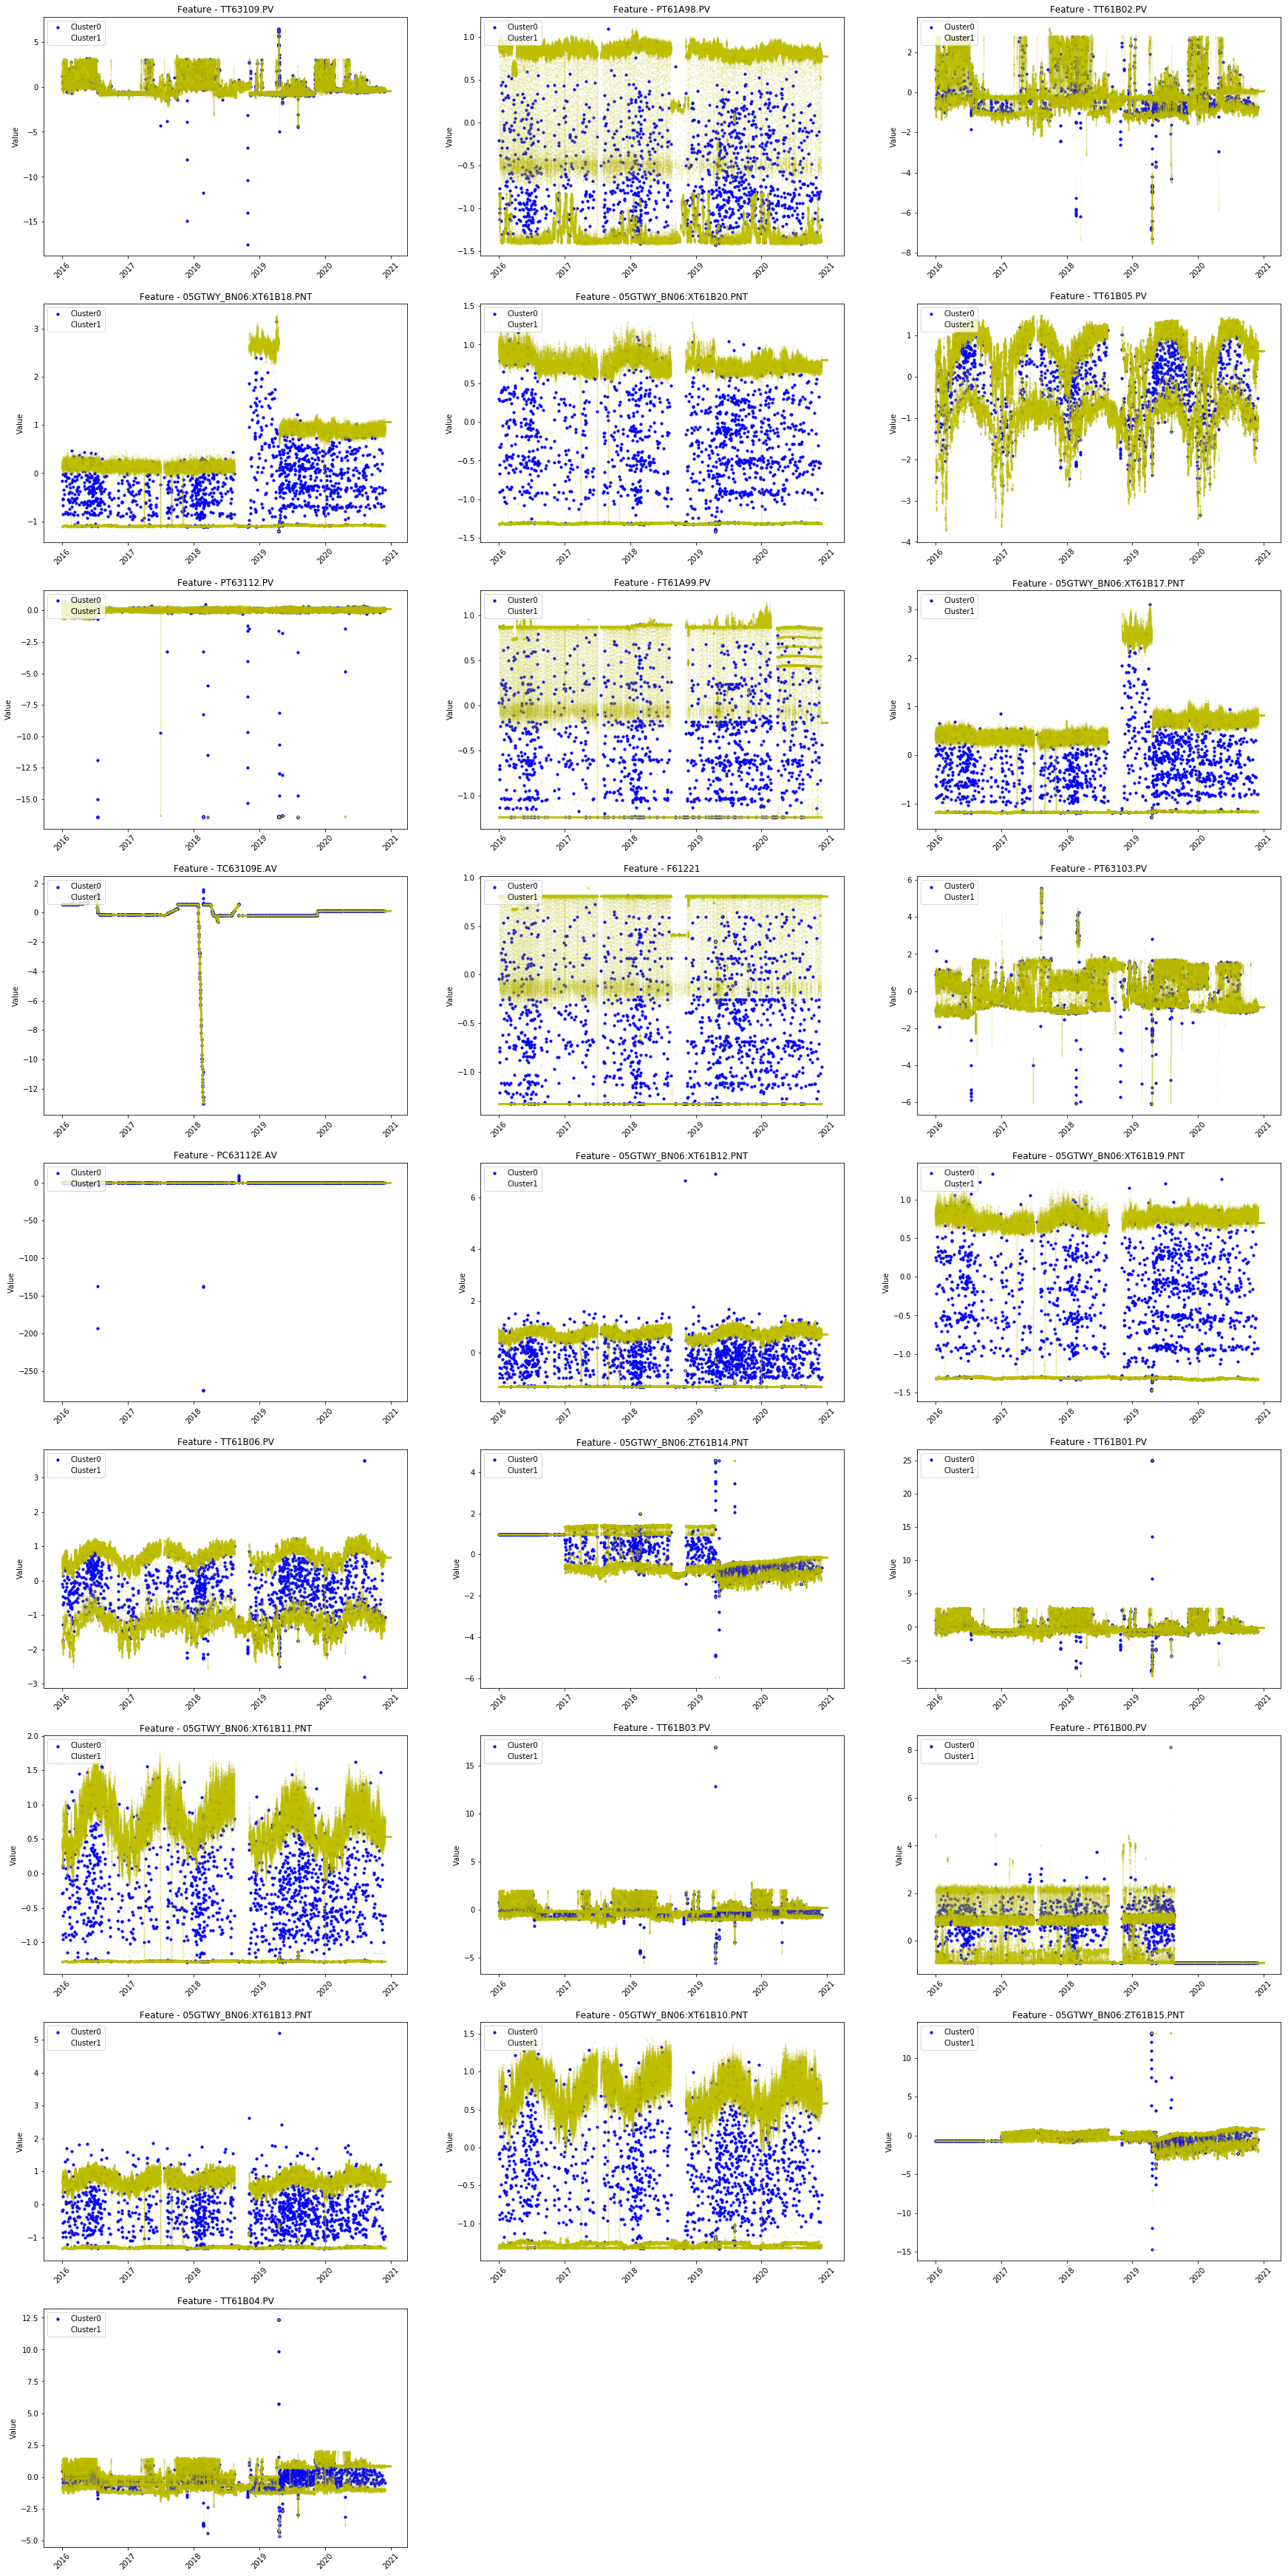

In [53]:
feature_set = list(X.keys())

colors = ['b', 'y', 'r', 'c', 'm', 'g', 'k']
xlabel = 'Time'
ylabel = 'Value'

total_plots = len(feature_set)
cols_plot = 3
rows_plot = math.ceil(total_plots/cols_plot)

plt.rcParams['figure.figsize'] = [cols_plot * 10, rows_plot * 7] # Size of the plots        
plt.figure()

unq_labels = np.unique(df_dbscan[agg_col]['labels'])
unq_labels.sort()

df_db = df_dbscan[agg_col]

idx = 0
for feature in feature_set:
       
    df = df_db[[time_col, feature, 'labels']]
    
    plt.subplot(rows_plot, cols_plot, idx+1)
    
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title('Feature - ' + feature)
    
    
    for i in range(len(unq_labels)):

        cluster_num = unq_labels[i]
        df_cluster = df[[time_col, feature]].loc[df['labels'] == cluster_num]
        x = np.array(df_cluster[time_col])
        y = np.array(df_cluster[feature])
        
        if cluster_num == -1:
            color = colors[0]
            size = 10
            alpha = 1
        else:
            color = colors[cluster_num+1%len(colors)]
            size = 1
            alpha = 0.1
            
        plt.scatter(x, y, c=color, alpha=alpha, s=size, label='Cluster'+str(i))
        
    plt.legend(loc='upper left')

    idx += 1

### Dates with outliers

In [54]:
df = df_dbscan[agg_col]
df = df[['labels','datetime']].loc[df['labels'] == -1]
df['dates'] = df['datetime'].apply(lambda x: x.date())
outlier_dates = np.unique(df['dates'])

print('Number of dates with outliers ', len(outlier_dates))

Number of dates with outliers  831


In [69]:
len(outlier_dates)

831

In [71]:
df.head()

labels            datetime       dates
41   -1      2016-01-01 03:25:01  2016-01-01
715  -1      2016-01-03 11:35:01  2016-01-03
1015 -1      2016-01-04 12:35:01  2016-01-04
1129 -1      2016-01-04 22:05:01  2016-01-04
1285 -1      2016-01-05 11:05:01  2016-01-05

In [73]:
df_dbscan.keys()

dict_keys(['agg60', 'agg5'])

In [76]:
import pickle as pkl

pkl_file = '../data/results/'+pump+'/dbscan/' + 'dbscan_agg60_0.9_3.pkl'
df = df_dbscan['agg5']
with open(pkl_file, 'wb') as f:
    pkl.dump(df, f, protocol=pkl.HIGHEST_PROTOCOL)

FileNotFoundError: [Errno 2] No such file or directory: '../data/results/P6302B/dbscan/dbscan_agg_0.9_3.pkl'